# IMPORT LIBRARIES

In [215]:
# import used libraries
import pandas as pd                        # pandas for data analysis
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt            # matplotlib for data visualisation
from scipy import stats  
import numpy as np
import seaborn as sns

In [ ]:
# for counting the number of occurences of each value in a list
from collections import Counter 

# import sklearn libraries for the random forest classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#for interactive plots
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.widgets import Slider

#T-test 
from scipy import stats

# anova test
from sklearn.metrics import r2_score

#for linear regression
import statsmodels.formula.api as smf

#for venn diagram
from matplotlib_venn import venn2

# Import the wordcloud library
from wordcloud import WordCloud

Installations : 

In [ ]:
!pip install empath
!pip install wordcloud
!pip install matplotlib-venn
!pip install plotly

In [268]:
DIR = "../data/"

#read
ENT_TIMESERIES_PATH = DIR + "ent_timeseries_15p.tsv.zip"
ENT_CHANNELS_PATH   = DIR + "ent_channels_15p.tsv.zip"
ENT_METADATA_PATH   = DIR + "ent_metadata.tsv.zip"

In [269]:
# entertainment timeseries
ent_timeseries = pd.read_csv(ENT_TIMESERIES_PATH)
ent_timeseries.datetime = pd.to_datetime(ent_timeseries.datetime)

# entertainment channels
ent_channels   = pd.read_csv(ENT_CHANNELS_PATH)
ent_channels.join_date = pd.to_datetime(ent_channels.join_date)

# entertainment metadata
ent_metadata   = pd.read_csv(ENT_METADATA_PATH)
ent_metadata.upload_date = pd.to_datetime(ent_metadata.upload_date)

***
# Display dataframes

##### CHANNELS

In [284]:
#sort channels by evolution score
ent_channels.sort_values(by=['growth_score'], inplace=True, ascending=False)

#display
ent_channels

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,last_date,last_subs,period,growth_score,has_buzzed
0,Entertainment,2015-05-12,UCk8GzjMOrta8yxDcKfylJYw,✿ Kids Diana Show,34700000,599,16.0,2.0870,2019-09-30 00:00:00,3.501429e+07,1602 days 00:00:00,21856.607812,1
1,Entertainment,2015-08-29,UCG8rbF3g2AMX70yOd8vqIZg,Logan Paul Vlogs,19800000,645,136.0,2.0870,2019-09-30 00:00:00,1.980000e+07,1493 days 00:00:00,13261.888814,1
2,Entertainment,2015-03-17,UChGJGhZ9SOOHvBB0Y4DOO_w,Ryan ToysReview,21600000,1512,95.0,2.0870,2019-09-30 00:00:00,2.170000e+07,1658 days 00:00:00,13088.057901,1
3,Entertainment,2014-05-13,UCKqx9r4mrFglauNBJc1L_eg,[토이푸딩] ToyPu...,25600000,2851,80.0,2.0870,2019-09-30 00:00:00,2.560000e+07,1966 days 00:00:00,13021.363174,1
4,Entertainment,2017-09-04,UCq8KR1lnewd5ZPx9_XKoubg,Johny FamilyShow,9250944,209,628.0,2.0870,2019-09-30 00:00:00,9.240000e+06,756 days 00:00:00,12222.222222,1
5,Entertainment,2016-03-17,UCgFXm4TI8htWmCyJ6cVPG_A,Toys and Colors,15500000,314,169.0,2.0870,2019-09-30 01:00:00,1.565774e+07,1292 days 01:00:00,12118.992334,1
6,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.0870,2019-09-30 00:00:00,5.672857e+07,4758 days 00:00:00,11922.776677,1
7,Entertainment,2015-12-01,UCucot-Zp428OwkyRm2I7v2Q,James Charles,16100000,234,190.0,2.0870,2019-09-30 00:00:00,1.610000e+07,1399 days 00:00:00,11508.220157,1
8,Entertainment,2019-05-30,UC55JghDUfUatuLc1wp4uGoA,SteveWillDoIt,1230000,15,9066.0,2.5435,2019-09-30 00:00:00,1.310000e+06,123 days 00:00:00,10650.406504,1
9,Entertainment,2016-01-14,UCCI5Xsd_gCbZb9eTeOf9FdQ,Like Nastya,14300000,237,226.0,2.0870,2019-09-30 00:00:00,1.434286e+07,1355 days 00:00:00,10585.134423,1


##### TIMESERIES

In [285]:
ent_timeseries

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity,has_buzzed
712170,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2017-06-19,7.243333e+02,9.033333e+01,1.988889e+01,0.000000,13,0,11,1
712171,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2017-06-26,1.356667e+03,6.323333e+02,3.311111e+01,13.222222,18,5,12,1
712172,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2017-07-03,3.962333e+03,2.605667e+03,1.370000e+02,103.888889,24,6,12,1
712173,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2017-07-10,1.392889e+04,9.966556e+03,5.240000e+02,387.000000,31,7,14,1
712174,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2017-07-17,3.967950e+04,2.575061e+04,1.334500e+03,810.500000,37,6,15,1
...,...,...,...,...,...,...,...,...,...,...,...
712284,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2019-08-26,8.472941e+08,8.928654e+06,8.369411e+06,38919.375000,196,1,3,1
712285,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2019-09-02,8.552876e+08,7.993450e+06,8.398830e+06,29419.500000,197,1,3,1
712286,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2019-09-09,8.629278e+08,7.640159e+06,8.420251e+06,21420.250000,198,1,3,1
712287,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2019-09-16,8.694337e+08,6.505938e+06,8.434358e+06,14107.750000,199,1,3,1


##### METADATA

In [222]:
#rename channel column in metadata
ent_metadata.rename(columns={'channel_id': 'channel'}, inplace=True)

#add column with has_buzzed in metadata
ent_metadata = pd.merge(ent_metadata, ent_channels[['channel', 'has_buzzed']], on='channel')

#displat
ent_metadata

,channel,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,has_buzzed
0,UCzvtdS9xJYZfJFosAvk9OXw,Subscribe Torrents Movies For More Hollywood M...,11.0,h3vWfR6ec4s,4153,43.0,"new movies,hindi dubbed movies,action movies,h...",New Released Hollywood Action Movie In Hindi D...,2019-09-26,4679,1
1,UCzvtdS9xJYZfJFosAvk9OXw,Subscribe TORRENTS MOVIES For More Hindi Dubbe...,3.0,visIzN0ifb4,9022,19.0,"new movies,south dubbed movies,action movies,h...",EK SHOLA | New Released South Dubbed Movie In ...,2019-09-23,2619,1
2,UCzvtdS9xJYZfJFosAvk9OXw,Subscribe Torrents Movies For More Latest Sout...,14.0,hTuv7PrT-_4,7795,36.0,"new movies,south dubbed movies,hindi movies,ac...",MADURAI KAND | New Release South Dubbed Movie ...,2019-09-19,5250,1
3,UCzvtdS9xJYZfJFosAvk9OXw,NaN,14.0,99OvZnZ6Vp4,9058,25.0,"south indian blockbuster movies,new action mov...",POLICE ADHIKARI new release south movie in h...,2019-07-09,7317,1
4,UCzvtdS9xJYZfJFosAvk9OXw,NaN,9.0,9ZWCK7qlKSg,7922,32.0,"NEW MOVIES,HINDI DUBBED MOVIES,ACTION MOVIES,D...",NEW SOUTH RELEASE ACTION DUSHMAN YAAR MOVIES ...,2019-06-09,6350,1
...,...,...,...,...,...,...,...,...,...,...,...
166041,UC-09JbCrEcB8UdiLcgx0TuQ,"In this video I set a new record for ""Fastest ...",5.0,VNl9S6SAysY,58,42.0,"whip,yt:stretch=16:9,Adam Winrich","Fastest Whip, Official Guinness World Record",2015-11-02,7958,0
166042,UC-09JbCrEcB8UdiLcgx0TuQ,I'm using 6 ft whippa lace stock whips by Simo...,1.0,KGo9V7HpNA4,432,100.0,"adam winrich,yt:stretch=16:9,bullwhip,stockwhi...",Bullwhip Cracking: the Maltese Falcon,2015-07-06,8683,0
166043,UC-09JbCrEcB8UdiLcgx0TuQ,A new routine I've been developing at the Scar...,6.0,QBR_cuDaqWM,204,228.0,"Adam Winrich,Adam Crack,Indiana Jones,whips,cr...",Adam Crack creates Indiana Jones V,2015-05-25,24218,0
166044,UC-09JbCrEcB8UdiLcgx0TuQ,In this rough video I show one way to replace ...,3.0,H657TarsRbg,330,98.0,"adam winrich,yt:stretch=16:9,bullwhip,stock whip",Bullwhip Repair: Replacing a Nylon Fall,2015-04-16,8006,0


***
### The youtuber that we choose as an example is : Emma Chamberlain

She start in 2016-06-13 and in 2017-06-19 she only has 19 subscribers. It means that during a whole year she did not grew. From 2017 she start growing a lot and ends up with 8.5M subscribers in 2019-06-23.
She is the perfect example of a small youtubers that follows our guidlines to become famous.

In [286]:
ent_timeseries[ent_timeseries.channel == 'UC78cxCAcp7JfQPgKxYdyGrg']

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity,has_buzzed
712170,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2017-06-19,7.243333e+02,9.033333e+01,1.988889e+01,0.000000,13,0,11,1
712171,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2017-06-26,1.356667e+03,6.323333e+02,3.311111e+01,13.222222,18,5,12,1
712172,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2017-07-03,3.962333e+03,2.605667e+03,1.370000e+02,103.888889,24,6,12,1
712173,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2017-07-10,1.392889e+04,9.966556e+03,5.240000e+02,387.000000,31,7,14,1
712174,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2017-07-17,3.967950e+04,2.575061e+04,1.334500e+03,810.500000,37,6,15,1
...,...,...,...,...,...,...,...,...,...,...,...
712284,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2019-08-26,8.472941e+08,8.928654e+06,8.369411e+06,38919.375000,196,1,3,1
712285,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2019-09-02,8.552876e+08,7.993450e+06,8.398830e+06,29419.500000,197,1,3,1
712286,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2019-09-09,8.629278e+08,7.640159e+06,8.420251e+06,21420.250000,198,1,3,1
712287,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2019-09-16,8.694337e+08,6.505938e+06,8.434358e+06,14107.750000,199,1,3,1


***
# Analysis parameter 
Let's add these informations on each videos from metadata
- `numwords` : number of words in the title 
- `num_capital_word`: number of words in capital letter in title
- `is_capital_title` : 1 if there is more than 2 words in capital letter in the title, 0 otherwise
- `feat` : 1 if the title contains a a word in the list of `featuring_wordsets`, 0 otherwise
- `is_tags` : 1 if the video has tags, 0 otherwise
- `numtags` : the number of tags used in the video
- `pronouns` : 1 if they used pronouns in the title, 0 otherwise (for each pronoun)
- `positive` : 1 if they used positive words in the title, 0 otherwise 
- `negative` : 1 if they used negative words in the title, 0 otherwise


##### NUMWORDS

In [223]:
#counts the number of words in a string
def count_words_simple(string):
    return len(string.split(" "))
    
#numwords in title
ent_metadata['numwords'] = ent_metadata["title"].apply(count_words_simple)

##### CAPITAL TITLE

In [224]:
#number of capital words in title
ent_metadata['num_capital_word'] = ent_metadata["title"].apply(lambda x : sum(map(str.isupper, x.split())))

#capital title if 2 or more words are capital
ent_metadata['is_capital_title'] = (ent_metadata.num_capital_word >= 2).astype(int)

##### FEATURINGS

In [225]:
#featuring 
featuring_wordsets = ['ft', 'ft.', 'feat.', 'feat', 'featuring', 'collab']

# is_in_string is a fuction returning 1 if a word from a wordlist is in a string, 0 otherwise
def is_in_string (string, wordlist):
    return any(word in string.lower().split(' ') for word in wordlist) * 1

ent_metadata['feat'] = ent_metadata['title'].apply(is_in_string, args=[featuring_wordsets])

##### NUMBER OF TAGS

In [226]:
# counts number of tags splitted by ","
def count_tags(string):
    return len(str(string).split(","))

# is there a tag ?
ent_metadata['is_tags'] = 1 - (ent_metadata['tags'].isna())*1

# number of tags
ent_metadata['numtags'] = ent_metadata["tags"].apply(count_tags) * ent_metadata['is_tags']


##### MOST USED TAGS

In [ ]:
from collections import Counter
Counter(" ".join(ent_metadata[ent_metadata.is_tags==1]["tags"]).lower().split(',')).most_common(10)

def most_used_tags(channel):
    return Counter(' '.join(ent_metadata[(ent_metadata.is_tags==1) & (ent_metadata.channel==channel)]["tags"]) \
                      .lower() \
                      .split(',')) \
                      .most_common(10)

ent_channels['most_used_tags'] = ent_channels.channel.apply(most_used_tags)

##### USE OF PRONOUNS

In [227]:
feature_wordsets = dict([
    # https://en.wikipedia.org/wiki/English_personal_pronouns
    ('first_person_singular', ['i', 'me', 'my', 'mine', 'myself',
                               "i'd", "i'll", "i'm", "i've", 'id', 'im', 'ive']),
    ('first_person_plural', ['we', 'us', 'our', 'ours', 'ourselves',
                              "we'd", "we'll", "we're", "we've",]),
    ('second_person', ['you','your','yours','yourself',
                              "ya", "you'd", "you'll", "you're", "you've", 'youll', 'youre', 'youve', 
                              'yourselves']),
    ('third_person_singular', ['he','him','his','himself',
                               "he'd", "he's", 'hes',
                               'she','her','hers','herself', 
                               "she'll", "she's", 'shes',
                               'it','its','itself',
                               'themself']),
    ('third_person_plural', ['they','them','their','theirs','themselves',
                              "they'd", "they'll", "they've", 'theyll', 'theyve'])
])


# is_in_string is a fuction returning 1 if a word from a wordlist is in a string, 0 otherwise
def is_in_string (string, wordlist):
    if any(word in string.lower().split(' ') for word in wordlist):
        return 1
    else :
        return 0

# We are going through each personnal pronouns and check if a word from its list is in each headline
list_pronouns = feature_wordsets.keys()
for pronoun in list_pronouns:
    ent_metadata[pronoun] = ent_metadata['title'].apply(is_in_string, args=[feature_wordsets[pronoun]])
    


##### USE OF POSITIVE AND NEGATIVE WORDS

In [233]:
# We are doing the same thing as before, but with a longer list of positive/negative words

# Open the list of positive words from a text file from internet, storing it in a dataframe with one column "words"
pos_words = pd.read_csv('https://ptrckprry.com/course/ssd/data/positive-words.txt', comment=';',
                        header=None).rename(columns={0: 'words'})
# Cheking if there are positive words in each headline
ent_metadata['positive'] = ent_metadata['title'].apply(is_in_string, args=[pos_words.words.values])


# Repeating the process with negative words
neg_words = pd.read_csv('https://ptrckprry.com/course/ssd/data/negative-words.txt', comment=';',
                        header=None, encoding = "ISO-8859-1").rename(columns={0: 'words'})
ent_metadata['negative'] = ent_metadata['title'].apply(is_in_string, args=[neg_words.words.values])


***
# Compute the mean of all features by channel


##### Compute all means then merge on channel

In [234]:
ent_channels = pd.merge(ent_channels,
                        ent_metadata.groupby('channel').mean()[['duration','numtags','is_capital_title','numwords','feat','is_tags','view_count','first_person_singular','first_person_plural','second_person','third_person_singular','third_person_plural','positive','negative']],
                        on = 'channel')
ent_channels = pd.merge(ent_channels,
                        ent_timeseries.groupby('channel').mean()[['delta_videos']], 
                        on = 'channel')

##### Rename columns

In [235]:
ent_channels.rename(columns={'duration':'mean_duration', 
                             'numtags':'mean_numtags', 
                             'is_capital_title':'mean_capital_title',
                             'numwords':'mean_numwords',
                             'feat':'mean_feats', 
                             'is_tags':'mean_is_tags',
                             'view_count':'mean_view_count',
                             'delta_videos':'week_freq',
                             'first_person_singular' : 'mean_first_person_singular',
                             'first_person_plural' : 'mean_first_person_plural',
                             'second_person' :  'mean_second_person',
                             'third_person_singular ' : 'mean_third_person_singular',
                             'third_person_plural' : 'mean_third_person_plural',
                                'positive' : 'mean_positive',
                                'negative' : 'mean_negative'
                             }, inplace=True)

all_channel_parameters = ['mean_capital_title','mean_numwords','mean_feats','mean_duration','mean_numtags','mean_is_tags','week_freq','mean_first_person_singular','mean_first_person_plural','mean_second_person','mean_third_person_singular','mean_third_person_plural','mean_positive','mean_negative']

In [236]:
ent_channels

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,last_date,last_subs,...,mean_is_tags,mean_view_count,mean_first_person_singular,mean_first_person_plural,mean_second_person,third_person_singular_y,mean_third_person_plural,mean_positive,mean_negative,week_freq
0,Entertainment,2017-12-12,UC495kynFX55dE0iorwV3RKQ,Dangie Bros,2470000,228,4410.0,2.3655,2019-09-30 01:00:00,2.480000e+06,...,0.995495,3.067348e+06,0.004505,0.144144,0.027027,0.031532,0.013514,0.162162,0.468468,2.308511
1,Entertainment,2016-11-29,UCYfbq37VGb-07tDS0FGtsPw,Piper Rockelle,3680000,266,2174.0,2.1390,2019-09-30 01:00:00,3.711607e+06,...,1.000000,2.014208e+06,0.365672,0.029851,0.011194,0.074627,0.011194,0.115672,0.268657,1.850000
2,Entertainment,2016-05-12,UCZSNzBgFub_WWil6TOTYwAg,Netflix India,4120000,763,2149.0,2.1330,2019-09-30 00:00:00,4.302857e+06,...,0.960474,9.452338e+05,0.025692,0.003953,0.031621,0.011858,0.005929,0.118577,0.156126,3.115385
3,Entertainment,2019-02-07,UC4pTrQqndbuz1XxGyp_i6Zg,Best of The Voice Ki...,675000,59,16112.0,2.8360,2019-09-30 01:00:00,7.112857e+05,...,1.000000,2.867970e+06,0.000000,0.000000,0.031250,0.046875,0.015625,0.734375,0.359375,2.000000
4,Entertainment,2017-09-08,UC1KnbLi0FcKNkWvsfcU2uuw,The MJ Family,2238147,87,5037.0,2.3915,2019-09-30 00:00:00,2.251429e+06,...,1.000000,1.628977e+06,0.353659,0.146341,0.073171,0.121951,0.000000,0.060976,0.158537,0.757009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,Entertainment,2006-09-01,UCkajzg4ohgu5o_z4XiJAhhA,Jimmy Slonina,11500,39,883707.0,12.4905,2019-09-23 00:00:00,1.150000e+04,...,0.900000,4.084900e+03,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.106509
571,Entertainment,2006-07-28,UCXKduX1yejuBywFMGK8PbYw,starwarsnut77,11200,325,899993.0,16.9810,2019-09-30 00:00:00,1.120000e+04,...,1.000000,2.248115e+03,0.052083,0.020833,0.000000,0.000000,0.000000,0.270833,0.187500,0.252809
572,Entertainment,2006-06-18,UCnpXtFei8_Jcl9Fz7Wh2e3Q,Tiago Azevedo,11300,156,919099.0,18.3495,2019-09-30 01:00:00,1.124226e+04,...,0.973333,4.034533e+02,0.040000,0.000000,0.000000,0.000000,0.000000,0.093333,0.113333,0.421053
573,Entertainment,2007-09-11,UCXwDgFB1GIdafrHoHaS_gAQ,TheTrue Pooka,10100,305,899703.0,17.7425,2019-09-30 00:00:00,1.010000e+04,...,0.990291,2.780330e+03,0.029126,0.009709,0.058252,0.029126,0.009709,0.203883,0.271845,0.377143


***
# Random Forest

We compute the random forest on the mean of all features by channel. We use the `sklearn` library.


In [237]:

X = ent_channels[all_channel_parameters]
y = ent_channels['has_buzzed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# view the classification report, which contains precision
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report)

KeyError: "['mean_third_person_singular'] not in index"

***
# Importance of features 

In [149]:

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)


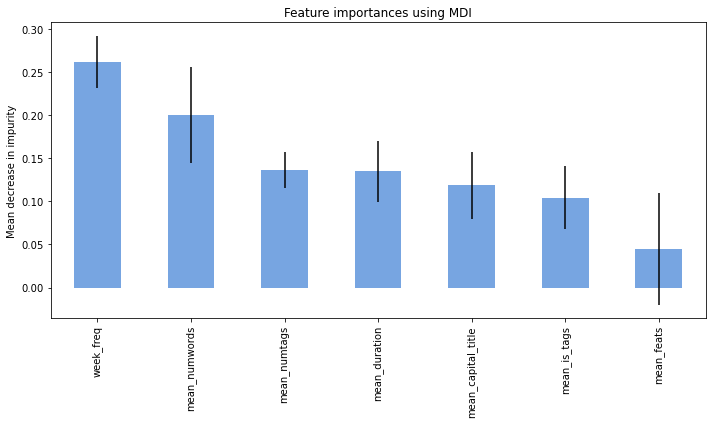

In [93]:

#forest_importances sorted by importance
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
fig1 , ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig1.tight_layout()


fig = go.Figure()
fig.add_trace(go.Bar(
    x=forest_importances.index,
    y=forest_importances.values,
    orientation='v',
    marker_color='#15836D' 
))

fig.update_layout(
    barmode='group', 
    xaxis_tickangle=-45,
    width=800,
    height=600,
    xaxis_title='Features',
    yaxis_title='Mean decrease in impurity',
    title='Importance of the features for the prediction of a channel\'s buzz',
    template=None,
    showlegend=False)
fig.update_yaxes(automargin=True)

fig.write_html("../../croquemADAme-datastory/_includes/file.html")

We observe that the most important features are the number of words in the title, the number of tags and the week_freq.

***
##### Mean of parameters

In [94]:
# print the means parameters of the channels that have buzzed
ent_channels[ent_channels['has_buzzed']==1][all_channel_parameters].mean()

mean_capital_title      0.301442
mean_numwords          10.066329
mean_feats              0.013810
mean_duration         607.135326
mean_numtags           14.393612
mean_is_tags            0.813896
week_freq               3.062544
dtype: float64

The best parameters are : 

`mean_numwords` : 10 words in the title

`mean_numtags` : 14 tags used 

`mean_week_freq` : 3 videos per week

`mean_duration` : 10 minutes 

`mean_is_tags` : 0.8 (use tags 80% of the time)

`mean_feat`: not relevant

`mean_capital_title` : 0.3 (use capital letter 30% of the time)


In [95]:
#print the means parameters of the channels that have not buzzed
ent_channels[ent_channels['has_buzzed']==0][all_channel_parameters].mean()

mean_capital_title      0.235565
mean_numwords           7.749969
mean_feats              0.018970
mean_duration         549.575983
mean_numtags           13.628911
mean_is_tags            0.831830
week_freq               0.618579
dtype: float64

***
##### T-test

We compute a t-test on each parameters to see which one has a significant difference between the two classes (buzzing channels and quiet channels )

In [96]:
#t_test for each parameter
from scipy import stats
for param in all_channel_parameters:
    print(param)
    print(stats.ttest_ind(ent_channels[ent_channels['has_buzzed']==1][param],
                          ent_channels[ent_channels['has_buzzed']==0][param]))
                          

mean_capital_title
Ttest_indResult(statistic=3.034277115623491, pvalue=0.0024991418680491086)
mean_numwords
Ttest_indResult(statistic=10.796505714309369, pvalue=2.8929115787776183e-25)
mean_feats
Ttest_indResult(statistic=-1.4493659593978951, pvalue=0.14767694447532254)
mean_duration
Ttest_indResult(statistic=1.0896186942588233, pvalue=0.27625082444980065)
mean_numtags
Ttest_indResult(statistic=0.9694415667669068, pvalue=0.33265504447006444)
mean_is_tags
Ttest_indResult(statistic=-0.7921901529072938, pvalue=0.42851440811307473)
week_freq
Ttest_indResult(statistic=6.844662245067825, pvalue=1.6590658929982693e-11)


We can see that the number of words in the title, the week_freq and the number of words in capital letter in the title are the most important features to predict if a channel is buzzing or not.
The rest of the features doesn't seem to be significant to predict if a channel is buzzing or not.

In [27]:
#run anova test for all parameters

#compute R2
r2_score(y_test, y_pred)

stats.f_oneway(ent_channels[ent_channels['has_buzzed']==1][all_channel_parameters],ent_channels[ent_channels['has_buzzed']==0][all_channel_parameters]) 


F_onewayResult(statistic=array([  9.20683761, 116.56453564,   2.10066168,   1.1872689 ,
         0.93981695,   0.62756524,  46.84940125]), pvalue=array([2.49914187e-03, 2.89291158e-25, 1.47676944e-01, 2.76250824e-01,
       3.32655044e-01, 4.28514408e-01, 1.65906589e-11]))

***
# Linear regression

##### Mean video duration for each channel

In [155]:
#run a linear regression for importan parameters
model = smf.ols(formula='mean_duration ~ C(has_buzzed)', data=ent_channels)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          mean_duration   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.187
Date:                Tue, 20 Dec 2022   Prob (F-statistic):              0.276
Time:                        12:51:47   Log-Likelihood:                -5678.5
No. Observations:                 712   AIC:                         1.136e+04
Df Residuals:                     710   BIC:                         1.137e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            549.5760     37

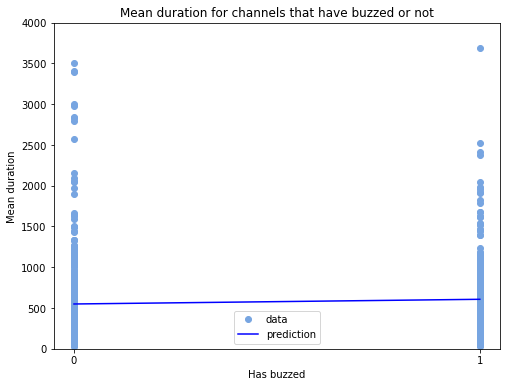

In [156]:
pred_ols = res.fittedvalues
fig, ax = plt.subplots(figsize=(8, 6))

#x is has_buzzed
x = ent_channels['has_buzzed']
#y is mean_duration
y = ent_channels['mean_duration']

ax.plot(x, y, "o", label="data")
ax.plot(x, pred_ols, "b-", label="prediction")
plt.legend()
plt.ylim(0, 4000)
plt.xticks([0, 1])
plt.title("Mean duration for channels that have buzzed or not")
plt.xlabel("Has buzzed")
plt.ylabel("Mean duration")

plt.show()

***
##### Mean week frequency upload for each channel

In [159]:
import statsmodels.formula.api as smf
model = smf.ols(formula='week_freq ~ C(has_buzzed)', data=ent_channels)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              week_freq   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     46.85
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           1.66e-11
Time:                        12:52:47   Log-Likelihood:                -2120.7
No. Observations:                 712   AIC:                             4245.
Df Residuals:                     710   BIC:                             4255.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6186      0

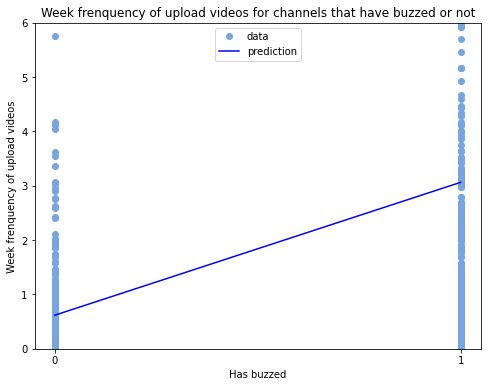

In [162]:
pred_ols = res.fittedvalues
fig, ax = plt.subplots(figsize=(8, 6))

#x is has_buzzed
x = ent_channels['has_buzzed']
#y is mean_duration
y = ent_channels['week_freq']

ax.plot(x, y, "o", label="data")
ax.plot(x, pred_ols, "b-", label="prediction")
plt.legend()
plt.ylim(0, 6)
plt.xticks([0, 1])
plt.title("Week frenquency of upload videos for channels that have buzzed or not")
plt.xlabel("Has buzzed")
plt.ylabel("Week frenquency of upload videos")

plt.show()

Thanks to the linear regression, we can see that the number of videos uploaded in a week by the channel is very affected by the fact that a video buzz or not. Indeed, the more a channel uploads videos in a week, the more the videos are likely to buzz.

***
##### Mean number of words in the title for each channel

In [163]:
import statsmodels.formula.api as smf
model = smf.ols(formula='mean_numwords ~ C(has_buzzed)', data=ent_channels)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          mean_numwords   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     116.6
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           2.89e-25
Time:                        12:53:41   Log-Likelihood:                -1758.1
No. Observations:                 712   AIC:                             3520.
Df Residuals:                     710   BIC:                             3529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.7500      0

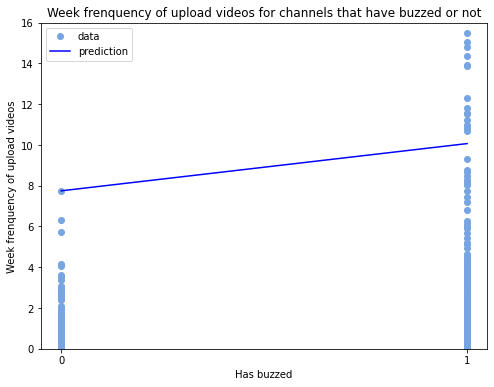

In [165]:
pred_ols = res.fittedvalues
fig, ax = plt.subplots(figsize=(8, 6))

#x is has_buzzed
x = ent_channels['has_buzzed']
#y is mean_duration
y = ent_channels['mean_numwords']

ax.plot(x, y, "o", label="data")
ax.plot(x, pred_ols, "b-", label="prediction")
plt.legend()
plt.ylim(0, 16)
plt.xticks([0, 1])
plt.title("Mean words in the title for channels that have buzzed or not")
plt.xlabel("Has buzzed")
plt.ylabel("Week frenquency of upload videos")

plt.show()

The number of word in the title is also a good indicator of the buzz of a video. Indeed, the more a video has words in the title, the more the video is likely to buzz. We can see that this number is increased by 30% for the buzzing videos.

***
# Most used tags in all videos

In [34]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pujol\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [43]:
from nltk.corpus import stopwords
s=set(stopwords.words('english'))

txt = "a long string of text about him and her"
#remove stopwords
txt = " ".join([word for word in txt.split() if word not in s])

print(txt)

long string text


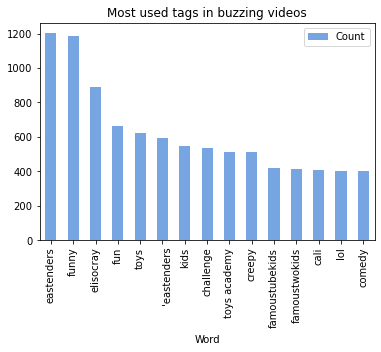

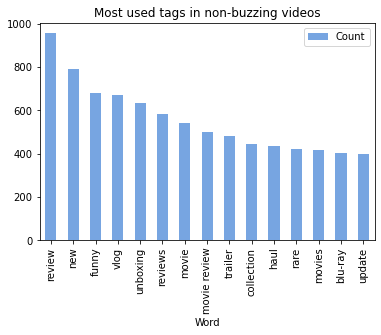

In [100]:
#remove all comomon words in a list of words
def remove_common_words(wordlist):
    common_words = ['the','a','in','of','and','to','for','on','with','is','at','by','from','as','an',
                    'be','that','this','it','its','are','have','has','had','was','were','will','would',
                    'could','can','may','might','must','should','if','then','than','so','or','but','not',
                    'no','all','any','both','each','few','more','most','other','some','such','what','when',
                    'where','which','who','whom','why','how','i','me','my','myself','we','our','ours',
                    'ourselves','you','your','yours','yourself','yourselves','he','him','his','himself',
                    'she','her','hers','herself','it','its','itself','they','them','their','theirs','themselves',
                    'what','which','who','whom','this','that','these','those','am','is','are','was','were',
                    'be','been','being','have','has','had','having','do','does','did','doing','a','an','the',
                    'and','but','if','or','because','as','until','while','of','at','by','for','with','about',
                    'against','between','into','through','during','before','after','above','below','to',
                    'from','up','down','in','out','on','off','over','under','again','further','then','once',
                    'here','there','when','where','why','how','all','any','both','each','few','more','most',
                    'other','some','such','no','nor','not','only','own','same','so','than','too','very','s',
                    't','can','will','just','don','should','now']
    return [word for word in wordlist if word not in common_words]
  
Buz_tags = ent_metadata[ent_metadata['has_buzzed']==1].groupby('channel')['tags'].agg(pd.Series.mode).values
Nbuz_tags = ent_metadata[ent_metadata['has_buzzed']==0].groupby('channel')['tags'].agg(pd.Series.mode).values
# split() returns list of all the words in the string
split_Buz = str(Buz_tags).lower().split(',')
split_Nbuz = str(Nbuz_tags).lower().split(',')
lst_buz = Counter(remove_common_words(split_Buz)).most_common(15)
lst_not_buz = Counter(remove_common_words(split_Nbuz)).most_common(15)
df_1 = pd.DataFrame(lst_buz, columns = ['Word', 'Count'])
df_2 = pd.DataFrame(lst_not_buz, columns = ['Word', 'Count'])
df_1.plot.bar(x='Word',y='Count')
plt.title("Most used tags in buzzing videos")
plt.savefig("../output/Most used tags in buzzing videos.png", dpi = 500)
df_2.plot.bar(x='Word',y='Count')
plt.title("Most used tags in non-buzzing videos")
plt.savefig("../output/Most used tags in non-buzzing videos.png", dpi = 500)
plt.show()

***
# Boxplot

We computed boxplot for each parameter for channels that have buzzed or not

<Figure size 1000x700 with 0 Axes>

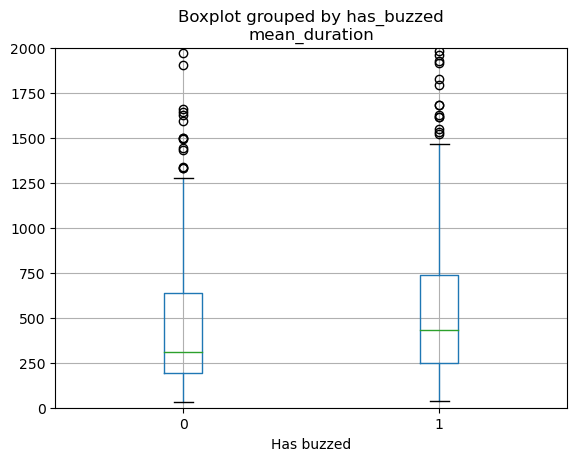

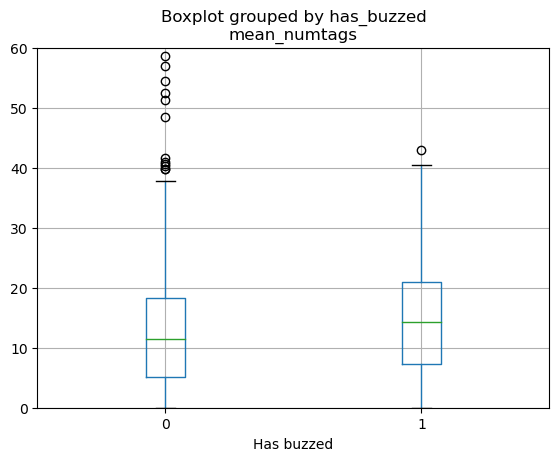

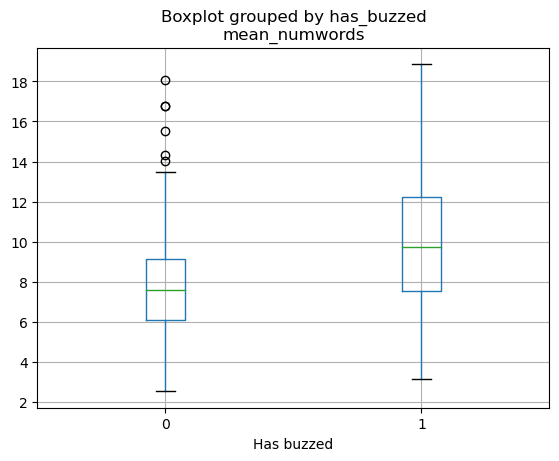

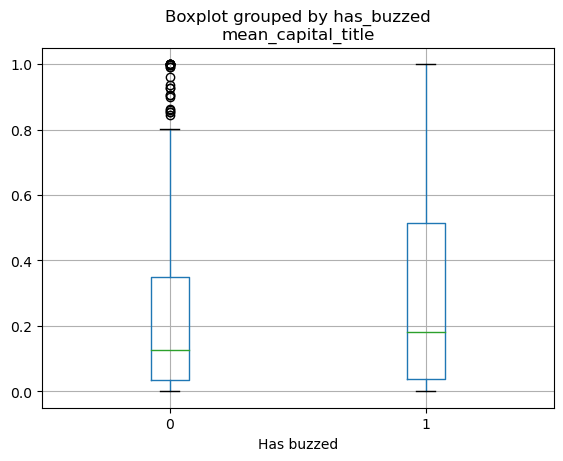

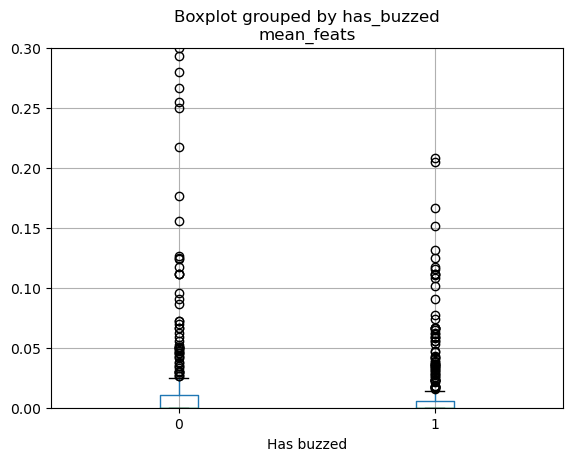

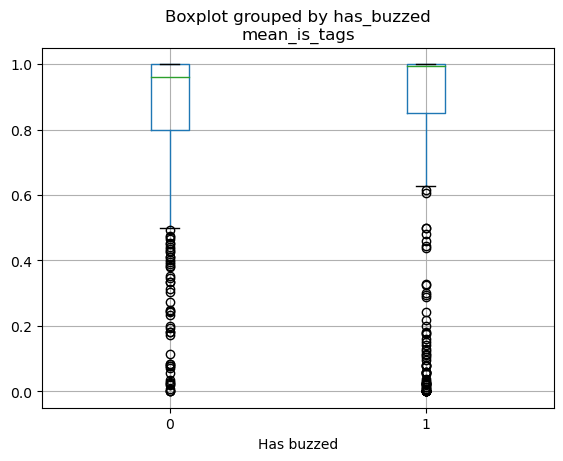

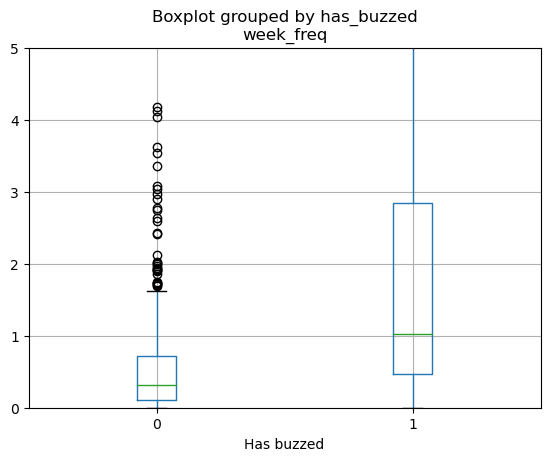

In [31]:
fig = plt.figure(figsize =(10, 7))
#boxplot for each parameter for channels that have buzzed or not

bp1 = ent_channels.boxplot(column=['mean_duration'], by=['has_buzzed'])
plt.xlabel('Has buzzed')
plt.ylim([0,2000])

bp2 = ent_channels.boxplot(column=['mean_numtags'], by=['has_buzzed'])
plt.xlabel('Has buzzed')
plt.ylim([0,60])

bp3 = ent_channels.boxplot(column=['mean_numwords'], by=['has_buzzed'])
plt.xlabel('Has buzzed')

bp4 = ent_channels.boxplot(column=['mean_capital_title'], by=['has_buzzed'])
plt.xlabel('Has buzzed')

bp5 = ent_channels.boxplot(column=['mean_feats'], by=['has_buzzed'])
plt.xlabel('Has buzzed')
plt.ylim([0,0.3])

bp6 = ent_channels.boxplot(column=['mean_is_tags'], by=['has_buzzed'])
plt.xlabel('Has buzzed')

bp7 = ent_channels.boxplot(column=['week_freq'], by=['has_buzzed'])
plt.ylim([0,5])
plt.xlabel('Has buzzed')

# show plot
plt.show()

#plot distribution of parameters for channels that have buzzed or not?

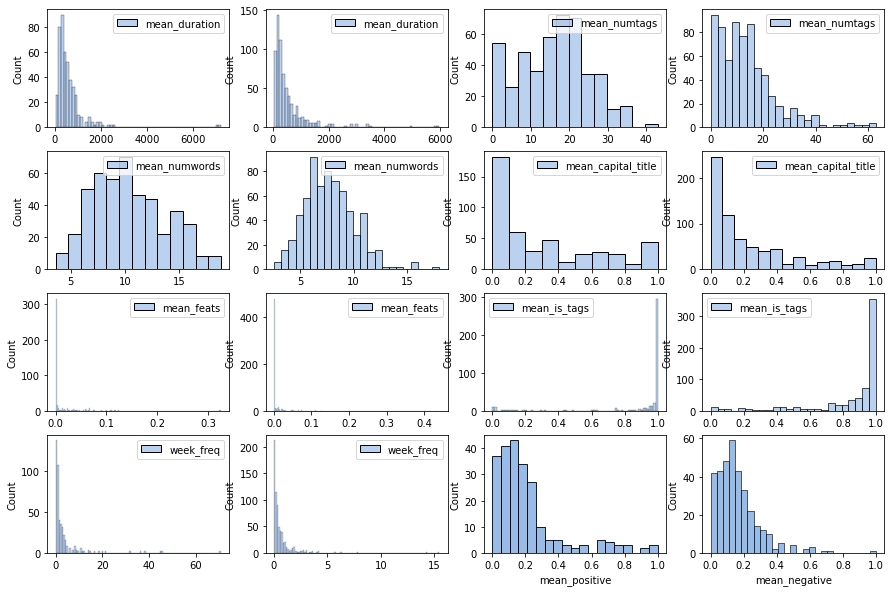

In [263]:

fig, ax = plt.subplots(4,4, figsize=(15, 10))
sns.histplot(ent_channels[ent_channels['has_buzzed']==1]['mean_duration'], ax=ax[0,0])
sns.histplot(ent_channels[ent_channels['has_buzzed']==0]['mean_duration'], ax=ax[0,1])
sns.histplot(ent_channels[ent_channels['has_buzzed']==1]['mean_numtags'], ax=ax[0,2])
sns.histplot(ent_channels[ent_channels['has_buzzed']==0]['mean_numtags'], ax=ax[0,3])
sns.histplot(ent_channels[ent_channels['has_buzzed']==1]['mean_numwords'], ax=ax[1,0])
sns.histplot(ent_channels[ent_channels['has_buzzed']==0]['mean_numwords'], ax=ax[1,1])
sns.histplot(ent_channels[ent_channels['has_buzzed']==1]['mean_capital_title'], ax=ax[1,2])
sns.histplot(ent_channels[ent_channels['has_buzzed']==0]['mean_capital_title'], ax=ax[1,3])
sns.histplot(ent_channels[ent_channels['has_buzzed']==1]['mean_feats'], ax=ax[2,0])
sns.histplot(ent_channels[ent_channels['has_buzzed']==0]['mean_feats'], ax=ax[2,1])
sns.histplot(ent_channels[ent_channels['has_buzzed']==1]['mean_is_tags'], ax=ax[2,2])
sns.histplot(ent_channels[ent_channels['has_buzzed']==0]['mean_is_tags'], ax=ax[2,3])
sns.histplot(ent_channels[ent_channels['has_buzzed']==1]['week_freq'], ax=ax[3,0])
sns.histplot(ent_channels[ent_channels['has_buzzed']==0]['week_freq'], ax=ax[3,1])
sns.histplot(ent_channels[ent_channels['has_buzzed']==1]['mean_positive'], ax=ax[3,2])
sns.histplot(ent_channels[ent_channels['has_buzzed']==0]['mean_negative'], ax=ax[3,3])
plt.show()



***
Create two dataframes :

`buzz_videos` : contains all the videos of the channels that have buzzed

`quiet_videos` : contains all the videos of the channels that have not buzzed

In [ ]:
buzz_videos = ent_metadata[ent_metadata['has_buzzed']==1]
quiet_videos = ent_metadata[ent_metadata['has_buzzed']==0]

***
# Number of videos uploaded by month

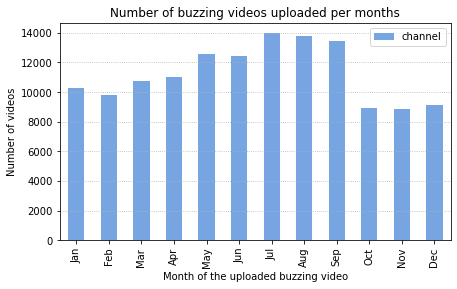

In [239]:
# For the buzzing channels 


months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

buzz_videos_perM = buzz_videos.groupby(buzz_videos['upload_date'].dt.month).count()[['channel']]
buzz_videos_perM['months'] = months
buzz_videos_perM.set_index('months', inplace=True)

buzz_videos_perM.plot(kind="bar",figsize=(7,4))
plt.grid(axis='y', ls=':')
plt.title('Number of buzzing videos uploaded per months')
plt.xlabel('Month of the uploaded buzzing video')
plt.ylabel('Number of videos')
plt.show()
plt.savefig("../output/Number of buzzing videos uploaded per months.png", dpi = 500)

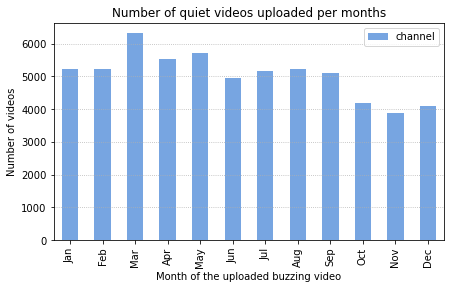

In [240]:
# For the quiet channels
quiet_videos_perM = quiet_videos.groupby(quiet_videos['upload_date'].dt.month).count()[['channel']]
quiet_videos_perM['months'] = months
quiet_videos_perM.set_index('months', inplace=True)

quiet_videos_perM.plot(kind="bar",figsize=(7,4))
plt.grid(axis='y', ls=':')
plt.title('Number of quiet videos uploaded per months')
plt.xlabel('Month of the uploaded buzzing video')
plt.ylabel('Number of videos')
plt.show()
plt.savefig("../output/Number of quiet videos uploaded per months.png", dpi = 500)

We can observe that the videos that buzzed are mostly uploaded in july and august and the videos that didn't buzz are mostly uploaded in march.

***
# Lexical analysis on title 

Empath is a tool for analyzing text across lexical categories (similar to LIWC), and also generating new lexical categories to use for an analysis
We used empath to calutate the frequency of each topic in the title of the videos.

In [102]:
# Analysis of the lexical fields
from empath import Empath 
lexicon = Empath()

#### Topics analysis on each video 
We firt did a topic analysis on each video without doing the mean by channel. We then did the same analysis on the mean of each channel. We found out that if a channel has a lot more of videos than another one, the analysis will be biased, and the channel with a lot a videos will weigth a lot compare to the channel with less videos. It is then better to do the analysis on the mean of each channel.

We decided to keep the analysis on the mean of each channel for our datastory.

In [141]:
topics_video= []
topics_video.append(lexicon.analyze(buzz_videos['title'].str.cat(sep = ' '), normalize = True))
topics_video.append(lexicon.analyze(quiet_videos['title'].str.cat(sep = ' '), normalize = True))
topics_video = pd.DataFrame(topics_video, index = ['buzzing', 'quiet'])
df= topics_video.copy().transpose()

In [142]:
df.reset_index(inplace=True)

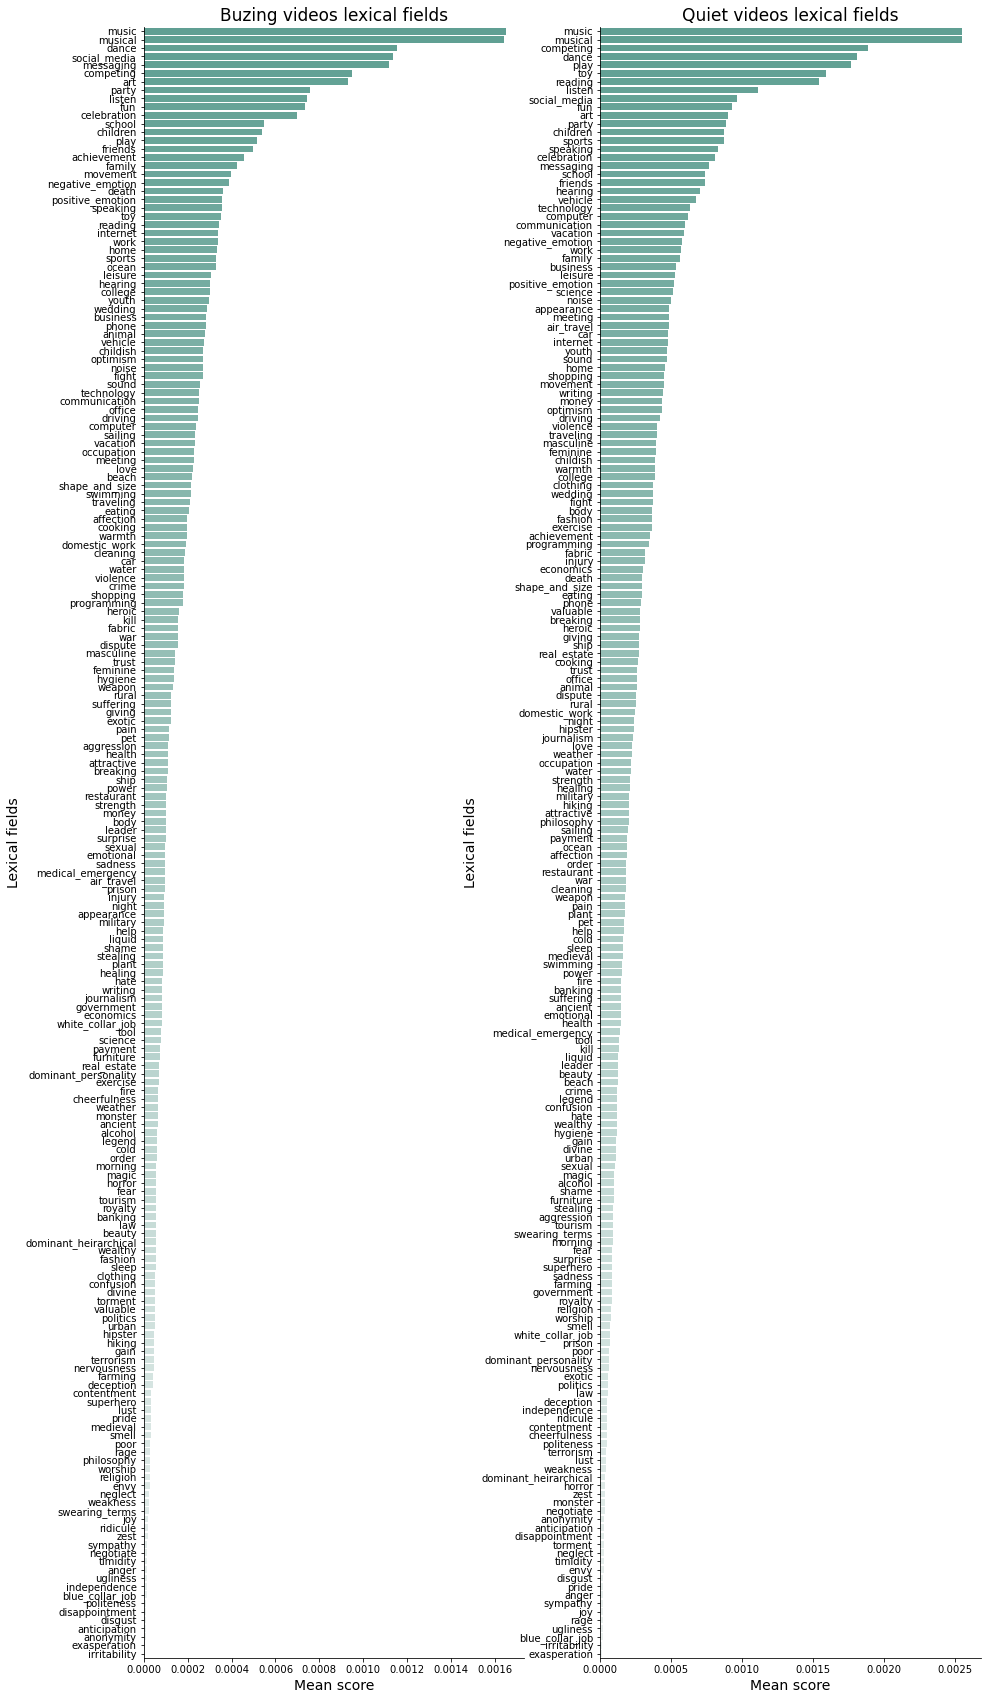

In [148]:
#plot the topics for buzzing and not buzzing videos



fig, ax = plt.subplots(1,2, figsize=(15, 30))

palette = sns.color_palette("light:#5A9", n_colors = len(df))
palette.reverse()

df = df.sort_values(by=['buzzing'],  ascending=False)
sns.barplot(x = 'buzzing', y = 'index', data=df, ax = ax[0], palette = palette)
ax[0].set_title("Buzing videos lexical fields", fontsize = 17)
ax[0].set_xlabel("Mean score", fontsize = 14)
ax[0].set_ylabel("Lexical fields", fontsize = 14)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

df = df.sort_values(by=['quiet'],  ascending=False)
sns.barplot(x = 'quiet', y = 'index', data=df, ax = ax[1], palette = palette)
ax[1].set_title("Quiet videos lexical fields", fontsize = 17)
ax[1].set_xlabel("Mean score", fontsize = 14)
ax[1].set_ylabel("Lexical fields", fontsize = 14)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

##### Topics analysis on each youtuber 

We compute the mean topics for each youtuber and then the mean of all youtubers for the buzzing and non buzzing videos.As mentionned before, we choose this analysis on the mean of each channel for our datastory.

In [190]:
#iterate on the channels
topics_buzzing = []
for i in buzz_videos.channel.unique():
    topics_buzzing.append(lexicon.analyze(buzz_videos['title'][buzz_videos.channel==i].str.cat(sep = ' '), normalize = True))
topics_buzzing = pd.DataFrame(topics_buzzing, index = buzz_videos.channel.unique())
    
topics_not_buzzing = []
for i in quiet_videos.channel.unique():
    topics_not_buzzing.append(lexicon.analyze(quiet_videos['title'][quiet_videos.channel==i].str.cat(sep = ' '), normalize = True))
topics_not_buzzing = pd.DataFrame(topics_not_buzzing, index = quiet_videos.channel.unique())


In [191]:
topics_buzzing = pd.DataFrame(topics_buzzing.mean())
topics_buzzing.columns = ['Buzzing']
topics_not_buzzing= pd.DataFrame(topics_not_buzzing.mean())
topics_not_buzzing.columns = ['Not Buzzing']
topics = pd.concat([topics_buzzing, topics_not_buzzing], axis = 1)

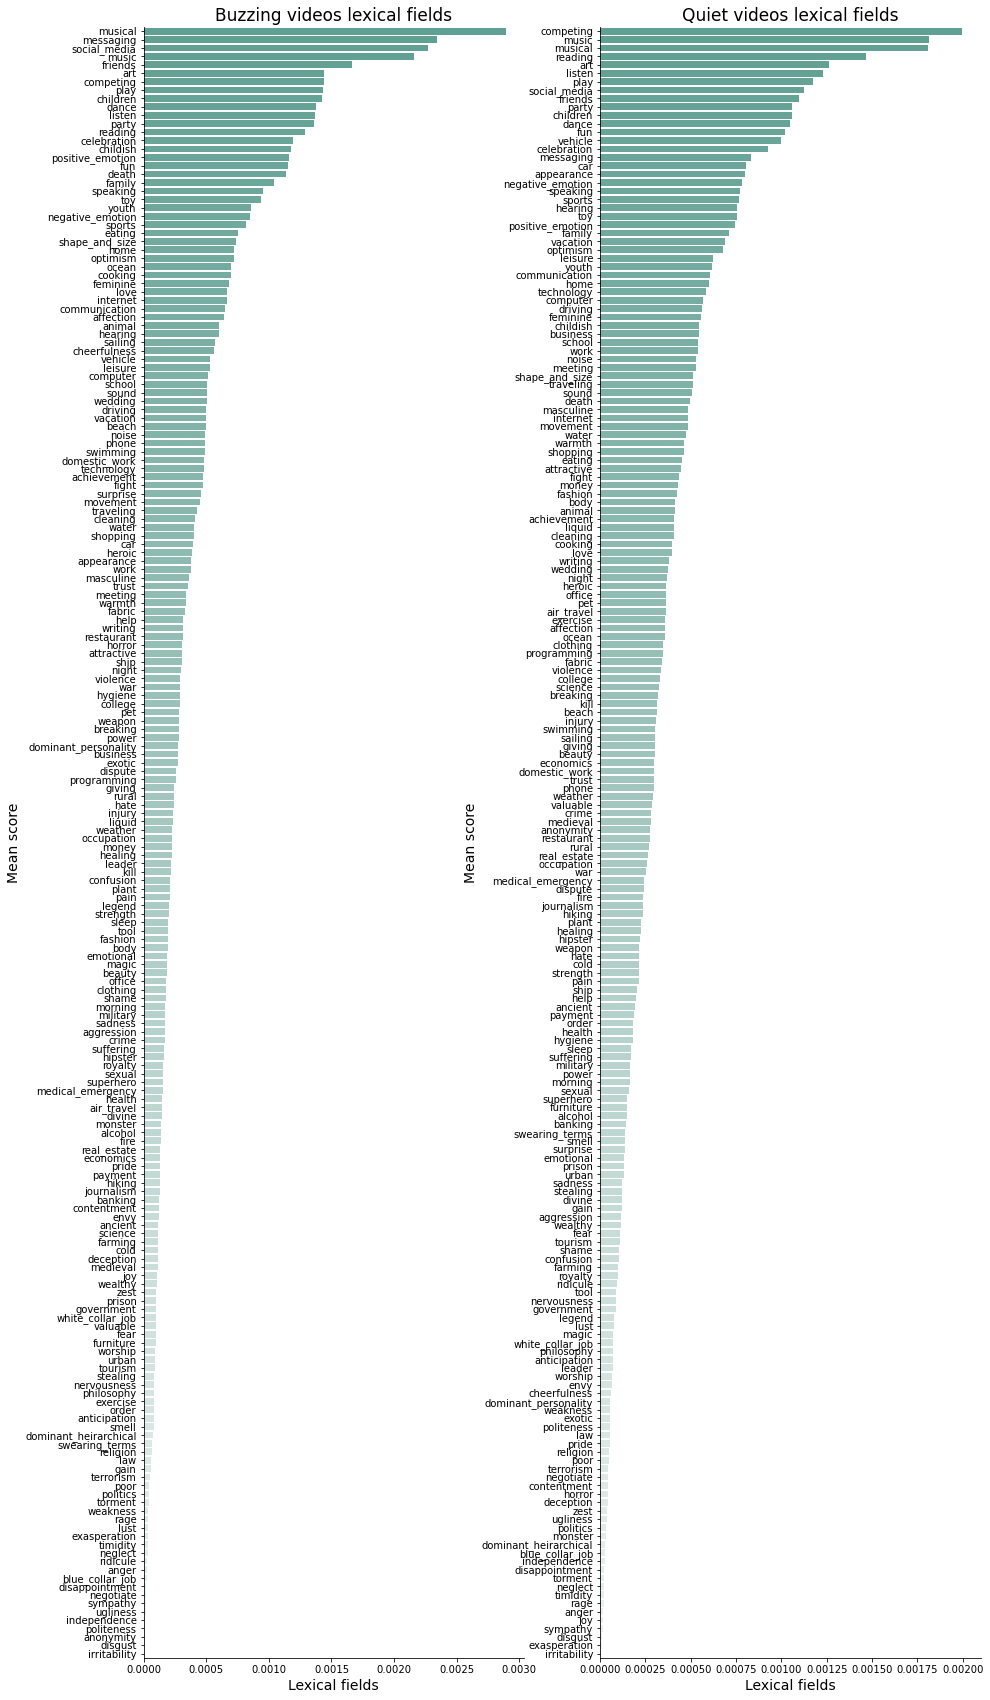

In [147]:
#plot the topics for buzzing and not buzzing channels

fig, ax = plt.subplots(1,2, figsize=(15, 30))

palette = sns.color_palette("light:#5A9", n_colors = len(topics_buzzing))
palette.reverse()

df_1 = topics_buzzing.sort_values(by=['Buzzing'],  ascending=False)
sns.barplot(x = 'Buzzing', y =  df_1.index, data=df_1, ax = ax[0], palette = palette)
ax[0].set_title("Buzzing videos lexical fields", fontsize = 18)
ax[0].set_xlabel("Lexical fields", fontsize = 15)
ax[0].set_ylabel("Mean score", fontsize = 15)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

palette = sns.color_palette("light:#5A9", n_colors = len(topics_not_buzzing))
palette.reverse()

df_2 = topics_not_buzzing.sort_values(by=['Not Buzzing'],  ascending=False)
sns.barplot(x = 'Not Buzzing' , y = df_2.index, data=df_2, ax = ax[1], palette = palette)
ax[1].set_title("Quiet videos lexical fields", fontsize = 18)
ax[1].set_xlabel("Lexical fields", fontsize = 15)
ax[1].set_ylabel("Mean score", fontsize = 15)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)






Exportation of the data for the datastory

In [107]:
#plot for the datastory
fig = go.Figure()
fig.add_trace(go.Bar(
    x= df_1.index,
    y=df_1['Buzzing'],
    orientation='v',
    marker_color='rgb(119, 143, 225)'
    
))

fig.update_layout(
    barmode='group', 
    xaxis_tickangle=-45,
    width=800,
    height=600,
    xaxis_title='Topics',
    xaxis = dict(rangeslider=dict(visible=True)),
    yaxis_title='Mean score',
    title="Buzzing videos lexical fields",
    template=None,
    showlegend=False)
fig.update_yaxes(automargin=True)

fig.write_html("../../croquemADAme-datastory/_includes/file1.html")

In [108]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x= df_1.index,
    y=df_1['Buzzing'],
    orientation='v',
    marker_color = 'rgb(173, 53, 95)'
    
))

fig.update_layout(
    barmode='group', 
    xaxis_tickangle=-45,
    width=800,
    height=600,
    xaxis_title='Topics',
    xaxis = dict(rangeslider=dict(visible=True)),
    yaxis_title='Mean score',
    title="Buzzing videos lexical fields",
    template=None,
    showlegend=False)
fig.update_yaxes(automargin=True)

fig.write_html("../../croquemADAme-datastory/_includes/file2.html")

##### Diagram of venn
We plot the venn diagram of the topics for the buzzing and non buzzing channels.
We wanna see if there is a difference between the topics of the buzzing and non buzzing channels. And is so what are the topics that are common to both and what are the topics that are specific to the buzzing channels.

In [192]:
topics_not_buzzing.reset_index(inplace=True)
topics_buzzing.reset_index(inplace=True)


N = 15

#we isolate the 15 most common lexical fields from our buzzing and non buzzing channels :
temp_df_1 = topics_buzzing.sort_values(by=['Buzzing'],  ascending=False, ignore_index=True)
Buz_LFs = temp_df_1.loc[:N-1,'index'].values
temp_df_2 = topics_not_buzzing.sort_values(by=['Not Buzzing'],  ascending=False, ignore_index=True)
Nbuz_LFs = temp_df_2.loc[:N-1,'index'].values


#we remove dupplicates:
most_common_topics = np.concatenate([Buz_LFs, Nbuz_LFs])
most_common_topics = np.array(most_common_topics).ravel()
most_common_topics = np.unique(most_common_topics)

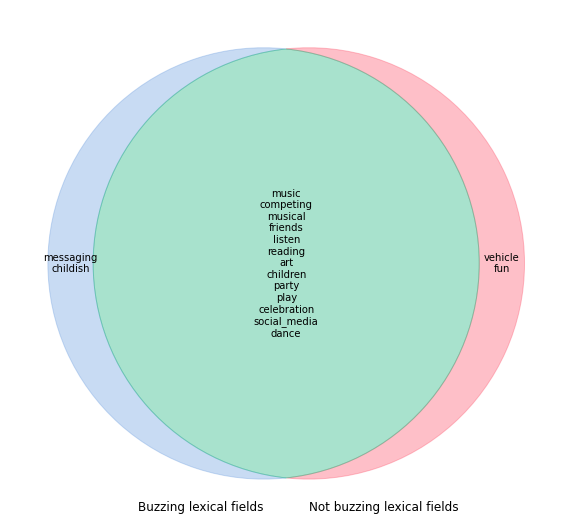

In [186]:
#Venn diagram
A = set(Buz_LFs)
B = set(Nbuz_LFs)

fig, ax = plt.subplots(1,1, figsize=(10, 10))

v = venn2([A, B], ('Buzzing lexical fields', "Not buzzing lexical fields"))
v.set_colors = ['rgb(119, 143, 225)', 'rgb(173, 53, 95)', 'rgb(173, 53, 95)']
v.get_label_by_id('11').set_text('\n'.join(A&B))
v.get_label_by_id('10').set_text('\n'.join(A-B))
v.get_label_by_id('01').set_text('\n'.join(B-A))
v.get_patch_by_id('10').set_color("#77a5e1")
v.get_patch_by_id('01').set_color("#fd6076")
v.get_patch_by_id('11').set_color("#26b782")

plt.savefig("../output/Venn diagram of the most used topics in the title of buzzing and quiet channels.png", dpi = 500)


We can see that from the 15 most common topics, 13 are common to both the buzzing and non buzzing channels. The 2 topics specific to the buzzing channels are "messaging" and "childish". Which means that the buzzing channels are more likely to talk about messaging and childish topics. So begginers should focus on these topics to get more views.

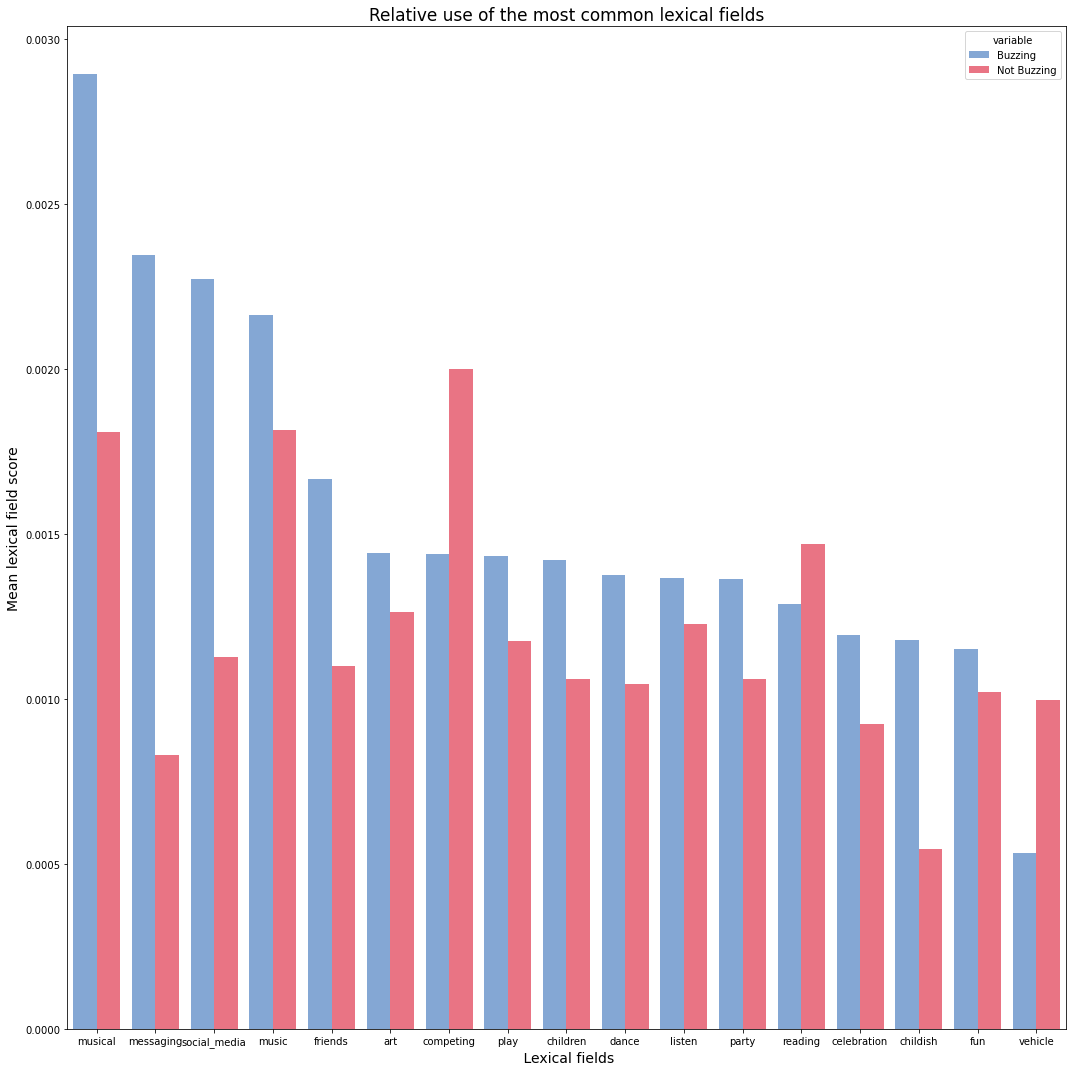

In [193]:
#we keep the 15 most common lexical fields of both buzzing and quiet

topics = topics.loc[most_common_topics]
topics.reset_index(inplace=True)
topics = topics.sort_values(by=['Buzzing', 'Not Buzzing'],  ascending=False)
temp_df = topics.melt(id_vars='index')


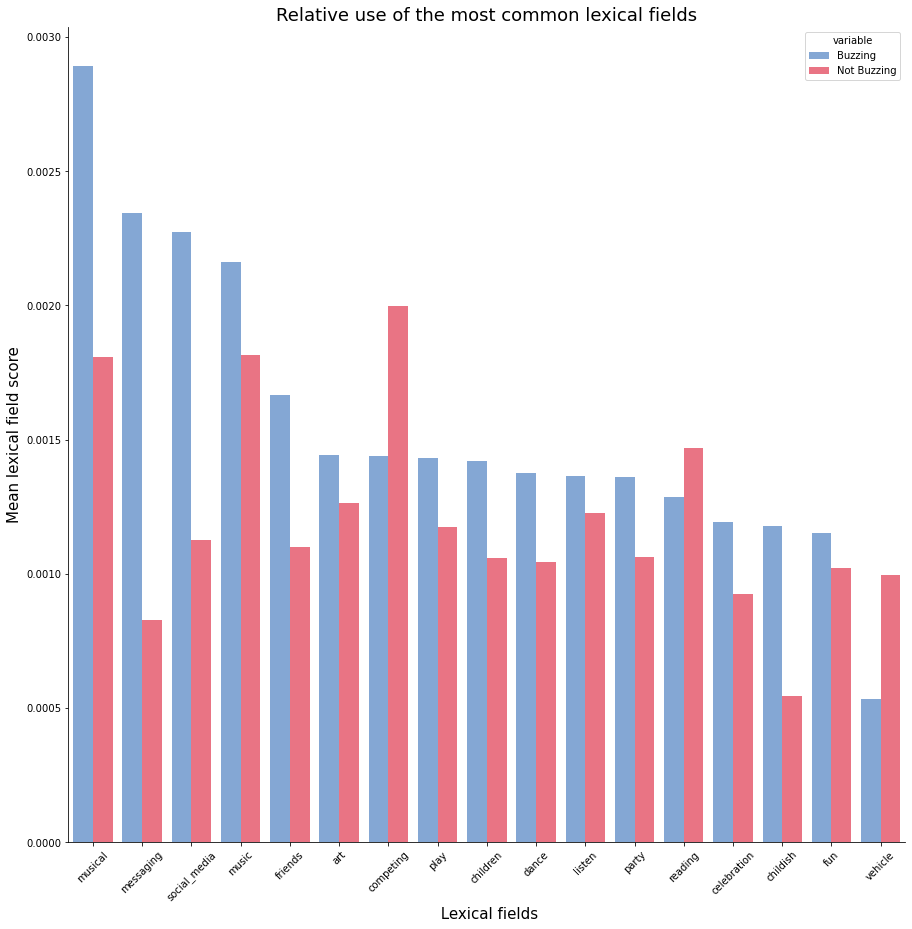

In [197]:

colors = [ "#77a5e1","#fd6076"]
sns.set_palette(sns.color_palette(colors))

#we build a barplot
fig, ax = plt.subplots(1,1, figsize=(15, 15))

sns.barplot(x = 'index', y = 'value', hue = 'variable', data = temp_df)

ax.set_title("Relative use of the most common lexical fields", fontsize = 18)
ax.set_xlabel(" Lexical fields", fontsize = 15)
ax.set_ylabel("Mean lexical field score", fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.show()
plt.savefig("../output/Relative use of the most common lexical fields.png", dpi = 500)

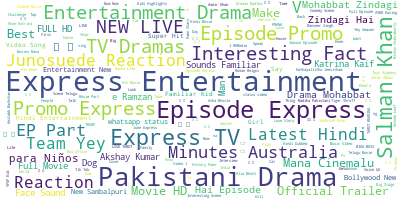

In [209]:
# Join the different processed titles together.
long_string =  ' '.join(list(buzz_videos['title'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=9, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(buzz_videos['title'].str.cat(sep=' '))
# Visualize the word cloud
wordcloud.to_image()

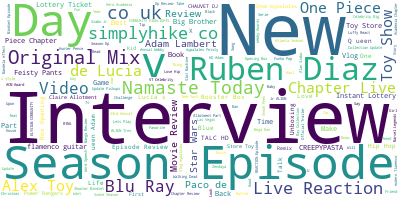

In [203]:
# Join the different processed titles together.
long_string =  quiet_videos['title'].str.cat(sep = ' ')
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=9, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# Sentiment analysis 

Do not work for now and we don't know if we keep it 

In [48]:
!pip install vaderSentiment

     -------------------------------------- 126.0/126.0 kB 1.8 MB/s eta 0:00:00


In [49]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()
text_1 = buzz_videos['title'][buzz_videos.channel=='UCztk4LFUIk4Ao4TCvpdnDsg']
text_2 =  "The pizza tastes terrible."
sent_1 = sentiment.polarity_scores(text_1)
sent_2 = sentiment.polarity_scores(text_2)
#transform sent_1 and sent_2 into a dataframe
sent_1 = pd.DataFrame.from_dict(sent_1, orient='index').T
sent_2 = pd.DataFrame.from_dict(sent_2, orient='index').T
sent_2

,neg,neu,pos,compound
0,0.508,0.492,0.0,-0.4767


In [50]:
sent_buzzing = []
for i in buzz_videos.channel.unique():
    sent_1 = sentiment.polarity_scores(buzz_videos['title'][buzz_videos.channel==i])
    sent_buzzing.append(pd.DataFrame.from_dict(sent_1, orient='index').T)
sent_buzzing = pd.DataFrame(sent_buzzing, index = buzz_videos.channel.unique())
    
sent_not_buzzing = []
for i in quiet_videos.channel.unique():
    sent_2 = sentiment.polarity_scores(quiet_videos['title'][quiet_videos.channel==i])
    sent_not_buzzing.append(pd.DataFrame.from_dict(sent_2, orient='index').T)
sent_not_buzzing = pd.DataFrame(sent_not_buzzing, index = quiet_videos.channel.unique())




KeyboardInterrupt: 